In [84]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px

In [85]:
PATH = 'data/global-data-on-sustainable-energy.csv'

In [86]:
df = pd.read_csv(PATH)

features = df.columns

countries = ['China', 'United States', 'India', 'Japan', 'Germany']

df_five_countries = df[(df['Entity'].isin(countries)) & (df['Year'] >= 2000)]

fig = go.Figure()

colors = {'China': 'blue', 'United States': 'green', 'India': 'orange', 'Japan': 'purple', 'Germany': 'brown'}

degree = 2

for country in countries:
    country_data = df_five_countries[df_five_countries['Entity'] == country]
    X = country_data['Year'].values.reshape(-1, 1)
    y = country_data[r'Low-carbon electricity (% electricity)'].values  # Adjust column name as needed
    
    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polynomial_model.fit(X, y)
    
    future_years = np.arange(X.min(), 2031).reshape(-1, 1)  # Start from the first year to the year 2030
    y_pred = polynomial_model.predict(future_years)
    
    predicted_full_series = np.concatenate([y, y_pred[len(X):]])  # Take historical y and append predicted for future
    
    fig.add_trace(go.Scatter(x=country_data['Year'], y=y, mode='lines+markers', name=f'{country} (Actual)', marker=dict(color=colors[country])))
    
    fig.add_trace(go.Scatter(x=future_years.flatten(), y=predicted_full_series, mode='lines', name=f'{country} (Predicted)', line=dict(color=colors[country], dash='dash')))

fig.update_layout(
    title='Low-carbon electricity (% electricity)',
    xaxis_title='Year',
    yaxis_title='Low-carbon Electricity Share (%)',
    legend_title='Country',
    showlegend=True
)

fig.show()

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [88]:
df['Total electricity (TWh)'] = df['Electricity from fossil fuels (TWh)'] + df['Electricity from renewables (TWh)'] + df['Electricity from nuclear (TWh)']

In [89]:
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Total electricity (TWh)
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953,0.47
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953,0.59
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953,0.69
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953,0.94
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953,0.89


In [90]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude', 'Total electricity (TWh)'],
      dtype='object')

In [91]:
# explore the Energy intensity level of primary energy (MJ/$2017 PPP GDP)

fig = px.scatter(df, x='Year', y='Energy intensity level of primary energy (MJ/$2017 PPP GDP)', color='Entity', title='Energy intensity level of primary energy (MJ/$2011 PPP GDP) over time')
fig.show()

In [92]:
# explore the Renewable-electricity-generating-capacity-per-capita

fig = px.scatter(df, x='Year', y='Renewable-electricity-generating-capacity-per-capita', color='Entity', title='Renewable-electricity-generating-capacity-per-capita over time')
fig.show()

In [93]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

subsaharan_df=pd.read_csv('data/subsaharan-africa.csv')
 
lowest_countries=['Chad', 'Niger', 'Burkina Faso', 'South Sudan', 'Central African Republic', 'Congo', 'Burundi', 'Malaw',  'Sierra Leone']
 
subsaharan_df=subsaharan_df[subsaharan_df['Entity'].isin(lowest_countries)]

subsaharan_df = subsaharan_df[['Entity', 'Year', 'Access to electricity (% of population)']].dropna()

degree = 2

fig = go.Figure()

for entity in subsaharan_df['Entity'].unique():
    entity_data = subsaharan_df[subsaharan_df['Entity'] == entity]
    X = entity_data['Year'].values.reshape(-1, 1)
    y = entity_data['Access to electricity (% of population)'].values

    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polynomial_model.fit(X, y)

    future_years = np.arange(X.min(), 2031).reshape(-1, 1)  # Start from the first year to the year 2030
    y_pred = polynomial_model.predict(future_years)

    predicted_full_series = np.concatenate((y, y_pred[len(X):]))  # Take historical y and append predicted for future

    fig.add_trace(go.Scatter(x=entity_data['Year'], y=y, mode='lines+markers', name=f'{entity} (Actual)'))

    fig.add_trace(go.Scatter(x=future_years.flatten(), y=predicted_full_series, mode='lines', name=f'{entity} (Predicted)', line=dict(dash='dash')))

fig.update_layout(
    title='Access to electricity (% of population)',
    xaxis_title='Year',
    yaxis_title='Access to electricity (%)',
    showlegend=True
)

fig.show()


# from sklearn.metrics import mean_squared_error, r2_score

# rmse = np.sqrt(mean_squared_error(y, y_pred))
# r2 = r2_score(y, y_pred)

# print(f'RMSE: {rmse}')
# print(f'R2 Score: {r2}')

In [94]:
subsaharan_df = pd.read_csv('data/subsaharan-africa.csv')

In [95]:
subsaharan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            953 non-null    object 
 1   Year                                                              953 non-null    int64  
 2   Access to electricity (% of population)                           944 non-null    float64
 3   Access to clean fuels for cooking                                 953 non-null    float64
 4   Renewable-electricity-generating-capacity-per-capita              953 non-null    float64
 5   Financial flows to developing countries (US $)                    579 non-null    float64
 6   Renewable energy share in the total final energy consumption (%)  908 non-null    float64
 7   Electricity from fossil fuels (TWh)

In [96]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

subsaharan_df = pd.read_csv('data/subsaharan-africa.csv')

lowest_countries = ['Chad', 'Niger', 'Burkina Faso', 'South Sudan', 'Central African Republic', 'Congo', 'Burundi', 'Malawi', 'Sierra Leone']

subsaharan_df = subsaharan_df[subsaharan_df['Entity'].isin(lowest_countries)]

features = ['Year', 
#            'Access to clean fuels for cooking', 
#            'Renewable-electricity-generating-capacity-per-capita', 
            'Electricity from fossil fuels (TWh)', 
            'Electricity from nuclear (TWh)', 
            'Electricity from renewables (TWh)', 
#            'Primary energy consumption per capita (kWh/person)', 
#            'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 
            'gdp_growth', 
#            'gdp_per_capita'
]

subsaharan_df = subsaharan_df[['Entity'] + ['Access to electricity (% of population)'] + features]

degree = 2

columns_to_scale = [col for col in features if col != 'Year']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()), columns_to_scale),
        ('passthrough', 'passthrough', ['Year'])
    ]
)

fig = go.Figure()

for entity in subsaharan_df['Entity'].unique():
    entity_data = subsaharan_df[subsaharan_df['Entity'] == entity]
    X = entity_data[features]
    y = entity_data['Access to electricity (% of population)'].values

    polynomial_model = make_pipeline(preprocessor, PolynomialFeatures(degree), LinearRegression())
    polynomial_model.fit(X, y)

    future_years = np.arange(X['Year'].max(), 2031).reshape(-1, 1)  # Start from the first year to the year 2030
    future_data = pd.DataFrame(future_years, columns=['Year'])
    for col in columns_to_scale:
        future_data[col] = entity_data[col].mean()  # Fill future data with mean values of the columns

    y_pred = polynomial_model.predict(future_data)

    predicted_full_series = np.concatenate((y, y_pred[len(X):]))  # Take historical y and append predicted for future

    fig.add_trace(go.Scatter(x=entity_data['Year'], y=y, mode='lines+markers', name=f'{entity} (Actual)'))

    fig.add_trace(go.Scatter(x=future_years.flatten(), y=predicted_full_series, mode='lines', name=f'{entity} (Predicted)', line=dict(dash='dash')))

fig.update_layout(
    title='Access to electricity (% of population)',
    xaxis_title='Year',
    yaxis_title='Access to electricity (%)',
    showlegend=True
)

fig.show()

C:\Users\Petter\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:598: UserWarning:

Skipping features without any observed values: ['gdp_growth']. At least one non-missing value is needed for imputation with strategy='mean'.

C:\Users\Petter\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:598: UserWarning:

Skipping features without any observed values: ['gdp_growth']. At least one non-missing value is needed for imputation with strategy='mean'.



In [97]:
# I want to make predictions to aid this goal: By 2030, increase substantially the share of renewable energy in the global energy mix

# I will use the data from the subsaharan-africa.csv dataset to make predictions on the share of renewable energy in the global energy mix by 2030.
# I should use this: Renewable energy share in the total final energy consumption

subsaharan_df = pd.read_csv('data/subsaharan-africa.csv')

# subsaharan_df.info()

# subsaharan_df.head()

# subsaharan_df.columns

# subsaharan_df['Renewable energy share in the total final energy consumption'].describe()

# subsaharan_df['Renewable energy share in the total final energy consumption'].isnull().sum()

# subsaharan_df['Renewable energy share in the total final energy consumption'].fillna(subsaharan_df['Renewable energy share in the total final energy consumption'].mean(), inplace=True)

# subsaharan_df['Renewable energy share in the total final energy consumption'].isnull().sum()

In [98]:
subsaharan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            953 non-null    object 
 1   Year                                                              953 non-null    int64  
 2   Access to electricity (% of population)                           944 non-null    float64
 3   Access to clean fuels for cooking                                 953 non-null    float64
 4   Renewable-electricity-generating-capacity-per-capita              953 non-null    float64
 5   Financial flows to developing countries (US $)                    579 non-null    float64
 6   Renewable energy share in the total final energy consumption (%)  908 non-null    float64
 7   Electricity from fossil fuels (TWh)

In [99]:
# predictions

import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

subsaharan_df = pd.read_csv('data/subsaharan-africa.csv')

lowest_countries = ['Chad', 'Niger', 'Burkina Faso', 'South Sudan', 'Central African Republic', 'Congo', 'Burundi', 'Malawi', 'Sierra Leone']

subsaharan_df = subsaharan_df[subsaharan_df['Entity'].isin(lowest_countries)]

features = ['Year',
            'Access to clean fuels for cooking',
            'Renewable-electricity-generating-capacity-per-capita',
            'Electricity from fossil fuels (TWh)',
            'Electricity from nuclear (TWh)',
            'Electricity from renewables (TWh)',
            'Primary energy consumption per capita (kWh/person)',
            'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
            'gdp_growth',
            'gdp_per_capita'
]

subsaharan_df = subsaharan_df[['Entity'] + ['Renewable energy share in the total final energy consumption (%)'] + features]

degree = 2

columns_to_scale = [col for col in features if col != 'Year']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()), columns_to_scale),
        ('passthrough', 'passthrough', ['Year'])
    ]
)

fig = go.Figure()
subsaharan_df['Renewable energy share in the total final energy consumption (%)'].fillna(subsaharan_df['Renewable energy share in the total final energy consumption (%)'].mean(), inplace=True)
for entity in subsaharan_df['Entity'].unique():
    entity_data = subsaharan_df[subsaharan_df['Entity'] == entity]
    X = entity_data[features]
    y = entity_data['Renewable energy share in the total final energy consumption (%)'].values

    polynomial_model = make_pipeline(preprocessor, PolynomialFeatures(degree), LinearRegression())
    polynomial_model.fit(X, y)

    future_years = np.arange(2021, 2031).reshape(-1, 1)  # Start from the first year to the year 2030
    future_data = pd.DataFrame(future_years, columns=['Year'])
    for col in columns_to_scale:
        future_data[col] = entity_data[col].mean()  # Fill future data with mean values of the columns

    y_pred = polynomial_model.predict(future_data)

    predicted_full_series = np.concatenate((y, y_pred[len(X):]))  # Take historical y and append predicted for future

    fig.add_trace(go.Scatter(x=entity_data['Year'], y=y, mode='lines+markers', name=f'{entity} (Actual)'))

    fig.add_trace(go.Scatter(x=future_years.flatten(), y=predicted_full_series, mode='lines', name=f'{entity} (Predicted)', line=dict(dash='dash')))

fig.update_layout(
    title='Renewable energy share in the total final energy consumption',
    xaxis_title='Year',
    yaxis_title='Renewable energy share (%)',
    showlegend=True
)

fig.show()

C:\Users\Petter\AppData\Local\Temp\ipykernel_2332\2629854968.py:44: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Petter\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:598: UserWarning:

Skipping features without any observed values: ['gdp_growth' 'gdp_per_capita']. At least one non-missing value is needed for imputation with strategy='mean'.

C:\Users\Petter\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:598: UserWarning:

Skipping features without any observed values: 

In [100]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Load dataset
subsaharan_df = pd.read_csv('data/subsaharan-africa.csv')

# List of countries with lowest access to clean fuels
lowest_countries = ['Chad', 'Niger', 'Burkina Faso', 'South Sudan', 'Central African Republic', 'Congo', 'Burundi', 'Malawi', 'Sierra Leone']

# Filter dataset for these countries
subsaharan_df = subsaharan_df[subsaharan_df['Entity'].isin(lowest_countries)]

# Features to include in the prediction model
features = [
    'Year',
    'Access to clean fuels for cooking',
    'Renewable-electricity-generating-capacity-per-capita',
    'Electricity from fossil fuels (TWh)',
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)',
    'Primary energy consumption per capita (kWh/person)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'gdp_growth',
    'gdp_per_capita'
]

# Select relevant columns
subsaharan_df = subsaharan_df[['Entity'] + ['Renewable energy share in the total final energy consumption (%)'] + features]

# Degree for polynomial features
degree = 2

# Columns to scale (all except 'Year')
columns_to_scale = [col for col in features if col != 'Year']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()), columns_to_scale),
        ('passthrough', 'passthrough', ['Year'])  # 'Year' is passed through unchanged
    ]
)

# Initialize plot
fig = go.Figure()

# Fill missing target values
subsaharan_df['Renewable energy share in the total final energy consumption (%)'].fillna(subsaharan_df['Renewable energy share in the total final energy consumption (%)'].mean(), inplace=True)

# Define a function to predict future renewable energy share
def predict_future(entity_data, entity, degree, future_years_range):
    # Prepare X and y
    X = entity_data[features]
    y = entity_data['Renewable energy share in the total final energy consumption (%)'].values

    # Create a polynomial regression pipeline
    polynomial_model = make_pipeline(preprocessor, PolynomialFeatures(degree), LinearRegression())
    polynomial_model.fit(X, y)

    # Prepare future data
    future_years = np.arange(future_years_range[0], future_years_range[1] + 1).reshape(-1, 1)
    future_data = pd.DataFrame(future_years, columns=['Year'])

    # Fill future data with mean values for the other features
    for col in columns_to_scale:
        future_data[col] = entity_data[col].mean()

    # Predict future values
    y_pred = polynomial_model.predict(future_data)

    # Return predicted values and future years
    return future_years.flatten(), y_pred

# Loop over each country to plot actual and predicted values
for entity in subsaharan_df['Entity'].unique():
    entity_data = subsaharan_df[subsaharan_df['Entity'] == entity]
    
    # Predict future values from 2021 to 2030
    future_years, y_pred = predict_future(entity_data, entity, degree, (2021, 2030))

    # Combine actual and predicted data
    fig.add_trace(go.Scatter(x=entity_data['Year'], y=entity_data['Renewable energy share in the total final energy consumption (%)'], mode='lines+markers', name=f'{entity} (Actual)'))

    fig.add_trace(go.Scatter(x=future_years, y=y_pred, mode='lines', name=f'{entity} (Predicted)', line=dict(dash='dash')))

# Update layout of the figure
fig.update_layout(
    title='Renewable energy share in the total final energy consumption',
    xaxis_title='Year',
    yaxis_title='Renewable energy share (%)',
    showlegend=True,
    template='plotly_white'
)

# Show the plot
fig.show()

C:\Users\Petter\AppData\Local\Temp\ipykernel_2332\4110974468.py:54: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Petter\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:598: UserWarning:

Skipping features without any observed values: ['gdp_growth' 'gdp_per_capita']. At least one non-missing value is needed for imputation with strategy='mean'.

C:\Users\Petter\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:598: UserWarning:

Skipping features without any observed values: 

In [101]:
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Total electricity (TWh)
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953,0.47
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953,0.59
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953,0.69
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953,0.94
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857,6.82
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857,7.35
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857,9.19
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857,8.24


In [102]:
file_path = 'data/global-data-on-sustainable-energy.csv'

In [103]:
df = pd.read_csv(file_path)
 
df_filtered = df[(df['Year'] >= 2000) & (df['Year'] <= 2019)] # 2020 data is not complete
 
country_emissions = df_filtered.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum()
top_5_countries = country_emissions.nlargest(5).index
 
df_top_5 = df_filtered[df_filtered['Entity'].isin(top_5_countries)]

In [104]:
df_top_5.isna().sum()

Entity                                                               0
Year                                                                 0
Access to electricity (% of population)                              0
Access to clean fuels for cooking                                    0
Renewable-electricity-generating-capacity-per-capita                60
Financial flows to developing countries (US $)                      60
Renewable energy share in the total final energy consumption (%)     0
Electricity from fossil fuels (TWh)                                  0
Electricity from nuclear (TWh)                                       0
Electricity from renewables (TWh)                                    0
Low-carbon electricity (% electricity)                               0
Primary energy consumption per capita (kWh/person)                   0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          0
Value_co2_emissions_kt_by_country                                    0
Renewa

In [105]:
df_top_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 714 to 3521
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            100 non-null    object 
 1   Year                                                              100 non-null    int64  
 2   Access to electricity (% of population)                           100 non-null    float64
 3   Access to clean fuels for cooking                                 100 non-null    float64
 4   Renewable-electricity-generating-capacity-per-capita              40 non-null     float64
 5   Financial flows to developing countries (US $)                    40 non-null     float64
 6   Renewable energy share in the total final energy consumption (%)  100 non-null    float64
 7   Electricity from fossil fuels (TWh)  

In [106]:
df_top_5.loc[df_top_5['Renewable-electricity-generating-capacity-per-capita'].isna()]

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
1282,Germany,2000,100.0,100.0,NaN,NaN,3.70,367.22,169.61,35.47,...,48903.700,4.00,8.302800e+05,2.887112,2.912503,23635.92922,240,357022.0,51.165691,10.451526
1283,Germany,2001,100.0,100.0,NaN,NaN,3.90,372.69,171.30,37.90,...,49841.387,4.05,8.476800e+05,2.941168,1.681468,23607.88286,240,357022.0,51.165691,10.451526
1284,Germany,2002,100.0,100.0,NaN,NaN,4.41,372.64,164.84,44.48,...,49257.790,3.97,8.333800e+05,3.538632,-0.197974,25077.72908,240,357022.0,51.165691,10.451526
1285,Germany,2003,100.0,100.0,NaN,NaN,5.44,390.81,165.06,46.67,...,49300.902,3.99,8.367900e+05,3.641990,-0.700117,30243.57653,240,357022.0,51.165691,10.451526
1286,Germany,2004,100.0,100.0,NaN,NaN,6.34,385.24,167.07,57.97,...,49342.406,3.97,8.210700e+05,4.516598,1.175088,34044.05363,240,357022.0,51.165691,10.451526
1287,Germany,2005,100.0,100.0,NaN,NaN,7.28,386.96,163.05,63.40,...,48793.566,3.92,8.023800e+05,5.208419,0.731707,34507.36881,240,357022.0,51.165691,10.451526
1288,Germany,2006,100.0,100.0,NaN,NaN,8.59,390.03,167.27,72.51,...,50043.030,3.89,8.144100e+05,6.026305,3.816442,36323.44774,240,357022.0,51.165691,10.451526
1289,Germany,2007,100.0,100.0,NaN,NaN,10.47,402.40,140.53,89.38,...,47958.130,3.58,7.838000e+05,7.653833,2.976455,41587.21290,240,357022.0,51.165691,10.451526
1290,Germany,2008,100.0,100.0,NaN,NaN,10.25,390.43,148.49,94.28,...,48445.984,3.59,7.896900e+05,7.817628,0.959879,45427.15168,240,357022.0,51.165691,10.451526
1291,Germany,2009,100.0,100.0,NaN,NaN,10.72,358.07,134.93,95.94,...,45436.277,3.56,7.348100e+05,8.454280,-5.693836,41485.90165,240,357022.0,51.165691,10.451526


In [107]:
df_top_5.loc[df_top_5['Financial flows to developing countries (US $)'].isna()]

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
1282,Germany,2000,100.0,100.0,NaN,NaN,3.70,367.22,169.61,35.47,...,48903.700,4.00,8.302800e+05,2.887112,2.912503,23635.92922,240,357022.0,51.165691,10.451526
1283,Germany,2001,100.0,100.0,NaN,NaN,3.90,372.69,171.30,37.90,...,49841.387,4.05,8.476800e+05,2.941168,1.681468,23607.88286,240,357022.0,51.165691,10.451526
1284,Germany,2002,100.0,100.0,NaN,NaN,4.41,372.64,164.84,44.48,...,49257.790,3.97,8.333800e+05,3.538632,-0.197974,25077.72908,240,357022.0,51.165691,10.451526
1285,Germany,2003,100.0,100.0,NaN,NaN,5.44,390.81,165.06,46.67,...,49300.902,3.99,8.367900e+05,3.641990,-0.700117,30243.57653,240,357022.0,51.165691,10.451526
1286,Germany,2004,100.0,100.0,NaN,NaN,6.34,385.24,167.07,57.97,...,49342.406,3.97,8.210700e+05,4.516598,1.175088,34044.05363,240,357022.0,51.165691,10.451526
1287,Germany,2005,100.0,100.0,NaN,NaN,7.28,386.96,163.05,63.40,...,48793.566,3.92,8.023800e+05,5.208419,0.731707,34507.36881,240,357022.0,51.165691,10.451526
1288,Germany,2006,100.0,100.0,NaN,NaN,8.59,390.03,167.27,72.51,...,50043.030,3.89,8.144100e+05,6.026305,3.816442,36323.44774,240,357022.0,51.165691,10.451526
1289,Germany,2007,100.0,100.0,NaN,NaN,10.47,402.40,140.53,89.38,...,47958.130,3.58,7.838000e+05,7.653833,2.976455,41587.21290,240,357022.0,51.165691,10.451526
1290,Germany,2008,100.0,100.0,NaN,NaN,10.25,390.43,148.49,94.28,...,48445.984,3.59,7.896900e+05,7.817628,0.959879,45427.15168,240,357022.0,51.165691,10.451526
1291,Germany,2009,100.0,100.0,NaN,NaN,10.72,358.07,134.93,95.94,...,45436.277,3.56,7.348100e+05,8.454280,-5.693836,41485.90165,240,357022.0,51.165691,10.451526


In [108]:
df_top_5 = df_top_5.drop(columns=['Financial flows to developing countries (US $)', 'Renewable-electricity-generating-capacity-per-capita'])

In [109]:
df_top_5.reset_index(inplace=True)

In [110]:
df_top_5

,index,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,714,China,2000,97.021800,42.0,29.63,1113.30,16.74,225.56,17.874004,9334.936,10.85,3346530.000,5.656925,8.490093,959.372484,153,9596960.0,35.86166,104.195397
1,715,China,2001,97.272790,42.3,28.36,1182.59,17.47,280.73,20.137900,9797.812,10.36,3529080.000,6.618624,8.335733,1053.108243,153,9596960.0,35.86166,104.195397
2,716,China,2002,97.516205,43.1,27.00,1337.46,25.13,291.41,19.137848,10602.087,10.12,3810060.059,6.280488,9.133631,1148.508290,153,9596960.0,35.86166,104.195397
3,717,China,2003,97.754380,43.4,23.86,1579.96,43.34,287.28,17.304693,12273.320,10.48,4415910.156,5.301109,10.038030,1288.643252,153,9596960.0,35.86166,104.195397
4,718,China,2004,97.989670,44.9,20.17,1795.41,50.47,357.43,18.513056,14272.745,10.83,5124819.824,5.600940,10.113621,1508.668098,153,9596960.0,35.86166,104.195397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3517,United States,2015,100.000000,100.0,9.03,2730.32,797.18,556.49,33.145770,79317.370,4.88,4990709.961,7.468743,3.075515,56863.371500,36,9833517.0,37.09024,-95.712891
96,3518,United States,2016,100.000000,100.0,9.46,2656.96,805.69,624.91,34.998875,78613.540,4.74,4894500.000,8.285086,1.711427,58021.400500,36,9833517.0,37.09024,-95.712891
97,3519,United States,2017,100.000000,100.0,9.92,2540.17,804.95,707.19,37.315506,78289.010,4.62,4819370.117,9.082049,2.332679,60109.655730,36,9833517.0,37.09024,-95.712891
98,3520,United States,2018,100.000000,100.0,10.12,2661.30,807.08,733.17,36.659092,80583.340,4.61,4975310.059,8.964939,2.996464,63064.418410,36,9833517.0,37.09024,-95.712891


In [111]:
# df_top_5.to_csv('data/top_5_countries.csv', index=False)

In [125]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [151]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Load dataset
subsaharan_df = pd.read_csv('data/subsaharan-africa.csv')

subsaharan_df = subsaharan_df[(subsaharan_df['Year'] >= 2000) & (subsaharan_df['Year'] <= 2019)]

lowest_countries = ['Chad', 'Niger', 'Burkina Faso', 'Central African Republic', 'Congo', 'Burundi', 'Malawi', 'Sierra Leone', 'South Sudan']

subsaharan_df = subsaharan_df[subsaharan_df['Entity'].isin(lowest_countries)]

features = ['Year',
            'Access to clean fuels for cooking',
            'Renewable-electricity-generating-capacity-per-capita',
            'Electricity from fossil fuels (TWh)',
            'Electricity from nuclear (TWh)',
            'Electricity from renewables (TWh)',
            'Primary energy consumption per capita (kWh/person)',
            'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
            'Renewable energy share in the total final energy consumption (%)',
            'gdp_growth',
            'gdp_per_capita'
]

subsaharan_df = subsaharan_df[['Entity'] + ['Access to electricity (% of population)'] + features]

degree = 2

columns_to_scale = [col for col in features if col != 'Year']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()), columns_to_scale),
        ('passthrough', 'passthrough', ['Year'])
    ]
)

fig = go.Figure()

# subsaharan_df = subsaharan_df['Access to electricity (% of population)'].fillna(subsaharan_df['Access to electricity (% of population)'].mean())

for entity in subsaharan_df['Entity'].unique():
    entity_data = subsaharan_df[subsaharan_df['Entity'] == entity]
    X = entity_data[features]
    y = entity_data['Access to electricity (% of population)'].values

    polynomial_model = make_pipeline(preprocessor, PolynomialFeatures(degree), LinearRegression())
    polynomial_model.fit(X, y)

    future_years = np.arange(2019, 2031).reshape(-1, 1)  # Start from the first year to the year 2030
    future_data = pd.DataFrame(future_years, columns=['Year'])
    for col in columns_to_scale:
        future_data[col] = entity_data[col].mean()  # Fill future data with mean values of the columns

    y_pred = polynomial_model.predict(future_data)

    predicted_full_series = np.concatenate((y, y_pred[len(X):]))  # Take historical y and append predicted for future

    fig.add_trace(go.Scatter(x=entity_data['Year'], y=y, mode='lines+markers', name=f'{entity} (Actual)'))

    fig.add_trace(go.Scatter(x=future_years.flatten(), y=predicted_full_series, mode='lines', name=f'{entity} (Predicted)', line=dict(dash='dash')))

fig.update_layout(
    title='Access to electricity (% of population)',
    xaxis_title='Year',
    yaxis_title='Access to electricity (% of population)',
    showlegend=True
)

fig.show()

C:\Users\Petter\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:598: UserWarning:

Skipping features without any observed values: ['gdp_growth' 'gdp_per_capita']. At least one non-missing value is needed for imputation with strategy='mean'.

C:\Users\Petter\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:598: UserWarning:

Skipping features without any observed values: ['gdp_growth' 'gdp_per_capita']. At least one non-missing value is needed for imputation with strategy='mean'.



In [133]:
subsaharan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 63 to 825
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            167 non-null    object 
 1   Year                                                              167 non-null    int64  
 2   Access to electricity (% of population)                           167 non-null    float64
 3   Access to clean fuels for cooking                                 167 non-null    float64
 4   Renewable-electricity-generating-capacity-per-capita              167 non-null    float64
 5   Financial flows to developing countries (US $)                    102 non-null    float64
 6   Renewable energy share in the total final energy consumption (%)  167 non-null    float64
 7   Electricity from fossil fuels (TWh)    

In [137]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression  # Add this import statement
import pandas as pd
import numpy as np
import plotly.graph_objs as go

subsaharan_df = pd.read_csv('raw_data/subsaharan-africa.csv')

subsaharan_df = subsaharan_df[(subsaharan_df['Year'] >= 2000) & (subsaharan_df['Year'] <= 2020)]

lowest_countries = ['Chad', 'Niger', 'Burkina Faso', 'Central African Republic', 'Congo', 'Burundi', 'Malawi', 'Sierra Leone', 'South Sudan']

fig = go.Figure()

colors = {'Chad': 'blue', 'Niger': 'green', 'Burkina Faso': 'orange', 'Central African Republic': 'purple', 'Congo': 'brown', 'Burundi': 'red', 'Malawi': 'pink', 'Sierra Leone': 'gray', 'South Sudan': 'black'}

subsaharan_df = subsaharan_df[subsaharan_df['Entity'].isin(lowest_countries)]

degree = 2

for country in lowest_countries: 
    country_data = subsaharan_df[subsaharan_df['Entity'] == country]
    X = country_data['Year'].values.reshape(-1, 1)
    y = country_data['Access to electricity (% of population)'].values
    
    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polynomial_model.fit(X, y)
    
    future_years = np.arange(X.min(), 2031).reshape(-1, 1)  # Start from the first year to the year 2030
    y_pred = polynomial_model.predict(future_years)
    
    predicted_full_series = np.concatenate([y, y_pred[len(X):]])  # Take historical y and append predicted for future
    
    fig.add_trace(go.Scatter(x=country_data['Year'], y=y, mode='lines+markers', name=f'{country} (Actual)', marker=dict(color=colors[country])))
    
    fig.add_trace(go.Scatter(x=future_years.flatten(), y=predicted_full_series, mode='lines', name=f'{country} (Predicted)', line=dict(color=colors[country], dash='dash')))

fig.update_layout(
    title='Access to electricity (% of population)',
    xaxis_title='Year',
    yaxis_title='Access to electricity (% of population)',
    legend_title='Country',
    showlegend=True,
    yaxis=dict(range=[0, 100])
)

fig.show()


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            0 non-null      object 
 1   Year                                                              0 non-null      int64  
 2   Access to electricity (% of population)                           0 non-null      float64
 3   Access to clean fuels for cooking                                 0 non-null      float64
 4   Renewable-electricity-generating-capacity-per-capita              0 non-null      float64
 5   Financial flows to developing countries (US $)                    0 non-null      float64
 6   Renewable energy share in the total final energy consumption (%)  0 non-null      float64
 7   Electricity from fossil fuels (TWh)                 

In [148]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import plotly.graph_objs as go

df = pd.read_csv('raw_data/global-data-on-sustainable-energy.csv')

countries = ['China', 'United States', 'India', 'Japan', 'Germany']

df = df[(df['Entity'].isin(countries)) & (df['Year'] >= 2000)]

fig = go.Figure()

colors = {'China': 'blue', 'United States': 'green', 'India': 'orange', 'Japan': 'purple', 'Germany': 'brown'}

# df = df[df['Entity'].isin(countries)]

degree = 2

for country in countries: 
    country_data = df[df['Entity'] == country]
    X = country_data['Year'].values.reshape(-1, 1)
    y = country_data['Access to electricity (% of population)'].values
    
    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polynomial_model.fit(X, y)
    
    future_years = np.arange(X.min(), 2031).reshape(-1, 1)  # Start from the first year to the year 2030
    y_pred = polynomial_model.predict(future_years)
    
    predicted_full_series = np.concatenate([y, y_pred[len(X):]])  # Take historical y and append predicted for future
    
    fig.add_trace(go.Scatter(x=country_data['Year'], y=y, mode='lines+markers', name=f'{country} (Actual)', marker=dict(color=colors[country])))
    
    # fig.add_trace(go.Scatter(x=future_years.flatten(), y=predicted_full_series, mode='lines', name=f'{country} (Predicted)', line=dict(color=colors[country], dash='dash')))

fig.update_layout(
    title='Access to electricity (% of population)',
    xaxis_title='Year',
    yaxis_title='Access to electricity (% of population)',
    legend_title='Country',
    showlegend=True,
    yaxis=dict(range=[0, 100])
)

fig.show()

In [155]:
import dash
from dash import dcc, html, Input, Output, State
import pandas as pd
import io
import base64
import plotly.express as px
import dash_bootstrap_components as dbc

# Initialize Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define the layout of the app
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H2("Upload Data and Visualize")),
    ]),
    dbc.Row([
        dbc.Col(
            dcc.Upload(
                id='upload-data',
                children=html.Div([
                    'Drag and Drop or ',
                    html.A('Select Files')
                ]),
                style={
                    'width': '100%',
                    'height': '60px',
                    'lineHeight': '60px',
                    'borderWidth': '1px',
                    'borderStyle': 'dashed',
                    'borderRadius': '5px',
                    'textAlign': 'center',
                    'margin': '10px'
                },
                multiple=False  # Do not allow multiple files
            ),
            width=12
        )
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id='output-graph'), width=12)
    ])
])

# Helper function to parse the uploaded file
def parse_contents(contents, filename):
    content_type, content_string = contents.split(',')
    decoded = base64.b64decode(content_string)
    
    try:
        if 'csv' in filename:
            # Assume that the user uploaded a CSV file
            df = pd.read_csv(io.StringIO(decoded.decode('utf-8')))
        elif 'xls' in filename:
            # Assume that the user uploaded an Excel file
            df = pd.read_excel(io.BytesIO(decoded))
        else:
            return None, "Unsupported file type"
        
        return df, None
    except Exception as e:
        return None, str(e)

# Callback to handle file upload and generate visualizations
@app.callback(
    Output('output-graph', 'figure'),
    Input('upload-data', 'contents'),
    State('upload-data', 'filename')
)
def update_output(contents, filename):
    if contents is None:
        # If no file is uploaded, display an empty graph
        return {}

    # Parse the uploaded file
    df, error = parse_contents(contents, filename)
    
    if error:
        return {}  # Return an empty graph in case of error

    # Check if the file has the expected structure (for example, check column names)
    required_columns = ['Entity', 'Year', 'Renewable energy share in the total final energy consumption (%)']
    if not all(col in df.columns for col in required_columns):
        return {}  # If the required structure is not met, return an empty graph

    # Generate a simple plot (scatter plot with lines) for visualization
    lowest_countries = ['Chad', 'Niger', 'Burkina Faso', 'Central African Republic', 'Congo', 'Burundi', 'Malawi', 'Sierra Leone', 'South Sudan']

    fig = go.Figure()

    colors = {'Chad': 'blue', 'Niger': 'green', 'Burkina Faso': 'orange', 'Central African Republic': 'purple', 'Congo': 'brown', 'Burundi': 'red', 'Malawi': 'pink', 'Sierra Leone': 'gray', 'South Sudan': 'black'}

    subsaharan_df = df[df['Entity'].isin(lowest_countries)]

    degree = 2

    for country in lowest_countries: 
        country_data = subsaharan_df[subsaharan_df['Entity'] == country]
        X = country_data['Year'].values.reshape(-1, 1)
        y = country_data['Access to electricity (% of population)'].values
        
        polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        polynomial_model.fit(X, y)
        
        future_years = np.arange(X.min(), 2031).reshape(-1, 1)  # Start from the first year to the year 2030
        y_pred = polynomial_model.predict(future_years)
        
        predicted_full_series = np.concatenate([y, y_pred[len(X):]])  # Take historical y and append predicted for future
        
        fig.add_trace(go.Scatter(x=country_data['Year'], y=y, mode='lines+markers', name=f'{country} (Actual)', marker=dict(color=colors[country])))
        
        fig.add_trace(go.Scatter(x=future_years.flatten(), y=predicted_full_series, mode='lines', name=f'{country} (Predicted)', line=dict(color=colors[country], dash='dash')))

    fig.update_layout(
        title='Access to electricity (% of population)',
        xaxis_title='Year',
        yaxis_title='Access to electricity (% of population)',
        legend_title='Country',
        showlegend=True,
        yaxis=dict(range=[0, 100])
    )

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[155], line 103, in update_output(
    contents='data:text/csv;base64,aW5kZXgsRW50aXR5LFllYXIsQWN...zLDM2LDk4MzM1MTcuMCwzNy4wOTAyNCwtOTUuNzEyODkxDQo=',
    filename='top_5_countries.csv'
)
    100 y = country_data['Access to electricity (% of population)'].values
    102 polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
--> 103 polynomial_model.fit(X, y)
        X = array([], shape=(0, 1), dtype=int64)
        y = array([], dtype=float64)
        polynomial_model = Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])
    105 future_years = np.arange(X.min(), 2031).reshape(-1, 1)  # Start from the first year to the year 2030
    106 y_pred = polynomial_model.predict(future_years)

File ~\AppData\Roaming\Python\Python312\site-packages

In [156]:
import dash
from dash import dcc, html, Input, Output, State
import pandas as pd
import io
import base64
import plotly.express as px
import dash_bootstrap_components as dbc

# Initialize Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define the layout of the app
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H2("Upload Data and Visualize Multiple Plots")),
    ]),
    dbc.Row([
        dbc.Col(
            dcc.Upload(
                id='upload-data',
                children=html.Div([
                    'Drag and Drop or ',
                    html.A('Select Files')
                ]),
                style={
                    'width': '100%',
                    'height': '60px',
                    'lineHeight': '60px',
                    'borderWidth': '1px',
                    'borderStyle': 'dashed',
                    'borderRadius': '5px',
                    'textAlign': 'center',
                    'margin': '10px'
                },
                multiple=False  # Do not allow multiple files
            ),
            width=12
        )
    ]),
    
    # Add placeholders for multiple plots (up to 10)
    dbc.Row([
        dbc.Col(dcc.Graph(id='plot1'), width=12),
        dbc.Col(dcc.Graph(id='plot2'), width=12),
        dbc.Col(dcc.Graph(id='plot3'), width=12),
        dbc.Col(dcc.Graph(id='plot4'), width=12),
        dbc.Col(dcc.Graph(id='plot5'), width=12),
        dbc.Col(dcc.Graph(id='plot6'), width=12),
        dbc.Col(dcc.Graph(id='plot7'), width=12),
        dbc.Col(dcc.Graph(id='plot8'), width=12),
        dbc.Col(dcc.Graph(id='plot9'), width=12),
        dbc.Col(dcc.Graph(id='plot10'), width=12),
    ])
])

# Helper function to parse the uploaded file
def parse_contents(contents, filename):
    content_type, content_string = contents.split(',')
    decoded = base64.b64decode(content_string)
    
    try:
        if 'csv' in filename:
            # Assume that the user uploaded a CSV file
            df = pd.read_csv(io.StringIO(decoded.decode('utf-8')))
        elif 'xls' in filename:
            # Assume that the user uploaded an Excel file
            df = pd.read_excel(io.BytesIO(decoded))
        else:
            return None, "Unsupported file type"
        
        return df, None
    except Exception as e:
        return None, str(e)

# Callback to handle file upload and generate multiple visualizations
@app.callback(
    [Output(f'plot{i}', 'figure') for i in range(1, 11)],
    Input('upload-data', 'contents'),
    State('upload-data', 'filename')
)
def update_output(contents, filename):
    if contents is None:
        # If no file is uploaded, display empty graphs for all plots
        return [{} for _ in range(10)]

    # Parse the uploaded file
    df, error = parse_contents(contents, filename)
    
    if error:
        return [{} for _ in range(10)]  # Return empty graphs in case of error

    # Check if the file has the expected structure (for example, check column names)
    required_columns = ['Entity', 'Year', 'Renewable energy share in the total final energy consumption (%)']
    if not all(col in df.columns for col in required_columns):
        return [{} for _ in range(10)]  # If the required structure is not met, return empty graphs

    # Placeholder 1: Line plot of Renewable Energy Share Over Time
    fig1 = px.line(df, x='Year', y='Renewable energy share in the total final energy consumption (%)', color='Entity',
                   title="Renewable Energy Share Over Time")

    # Placeholder 2: Bar chart for Renewable Energy Share by Entity
    fig2 = px.bar(df, x='Entity', y='Renewable energy share in the total final energy consumption (%)', 
                  title="Renewable Energy Share by Country")

    # Placeholder 3: Scatter plot of GDP per capita vs Renewable Energy Share
    if 'gdp_per_capita' in df.columns:
        fig3 = px.scatter(df, x='gdp_per_capita', y='Renewable energy share in the total final energy consumption (%)', 
                          color='Entity', title="GDP per Capita vs Renewable Energy Share")
    else:
        fig3 = {}

    # Placeholder 4: Scatter plot for Energy from Renewables (if available)
    if 'Electricity from renewables (TWh)' in df.columns:
        fig4 = px.scatter(df, x='Year', y='Electricity from renewables (TWh)', color='Entity', 
                          title="Electricity from Renewables Over Time")
    else:
        fig4 = {}

    # Placeholder 5: Histogram of Renewable Energy Share
    fig5 = px.histogram(df, x='Renewable energy share in the total final energy consumption (%)', nbins=20, 
                        title="Distribution of Renewable Energy Share")

    # Placeholder 6 to 10: Empty for now (you can customize these)
    fig6 = {}
    fig7 = {}
    fig8 = {}
    fig9 = {}
    fig10 = {}

    # Return all plots
    return fig1, fig2, fig3, fig4, fig5, fig6, fig7, fig8, fig9, fig10

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [157]:
import dash
from dash import dcc, html, Input, Output, State
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import base64
import io
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout with upload button and graph placeholders
app.layout = html.Div([
    html.H1("Energy Predictions and Visualization"),
    dcc.Upload(
        id='upload-data',
        children=html.Div([
            'Drag and Drop or ',
            html.A('Select File')
        ]),
        style={
            'width': '100%',
            'height': '60px',
            'lineHeight': '60px',
            'borderWidth': '1px',
            'borderStyle': 'dashed',
            'borderRadius': '5px',
            'textAlign': 'center',
            'margin': '10px'
        },
        multiple=False
    ),
    html.Div(id='output-data-upload'),
    dcc.Graph(id='graph1'),
    dcc.Graph(id='graph2'),
    dcc.Graph(id='graph3'),
    dcc.Graph(id='graph4'),
])

# Function to parse the uploaded file and create a DataFrame
def parse_contents(contents, filename):
    content_type, content_string = contents.split(',')
    decoded = base64.b64decode(content_string)
    
    try:
        if 'csv' in filename:
            df = pd.read_csv(io.StringIO(decoded.decode('utf-8')))
        elif 'xls' in filename:
            df = pd.read_excel(io.BytesIO(decoded))
        else:
            return None
        return df
    except Exception as e:
        print(e)
        return None

# Callback to handle file upload and generate plots
@app.callback(
    [Output('graph1', 'figure'),
     Output('graph2', 'figure'),
     Output('graph3', 'figure'),
     Output('graph4', 'figure')],
    Input('upload-data', 'contents'),
    State('upload-data', 'filename')
)
def update_output(contents, filename):
    if contents is None:
        return {}, {}, {}, {}
    
    df = parse_contents(contents, filename)

    # Placeholder 1: Top 5 Countries - Access to Electricity
    countries = ['China', 'United States', 'India', 'Japan', 'Germany']
    fig1 = plot_access_electricity(df, countries)

    # Placeholder 2: Subsaharan Africa (Lowest Access)
    subsaharan_countries = ['Chad', 'Niger', 'Burkina Faso', 'Central African Republic', 'Congo', 'Burundi', 'Malawi', 'Sierra Leone', 'South Sudan']
    fig2 = plot_access_electricity(df, subsaharan_countries)

    # Placeholder 3: Low-carbon Electricity - Top 5 Countries
    fig3 = plot_low_carbon(df, countries)

    # Placeholder 4: Energy Intensity - Africa
    fig4 = plot_energy_intensity(df)

    return fig1, fig2, fig3, fig4

# Function for Access to Electricity plot
def plot_access_electricity(df, countries):
    df_filtered = df[df['Entity'].isin(countries)]
    fig = go.Figure()

    for country in countries:
        country_data = df_filtered[df_filtered['Entity'] == country]
        X = country_data['Year'].values.reshape(-1, 1)
        y = country_data['Access to electricity (% of population)'].values
        
        # Polynomial regression model
        degree = 2
        polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        polynomial_model.fit(X, y)
        
        future_years = np.arange(X.min(), 2031).reshape(-1, 1)
        y_pred = polynomial_model.predict(future_years)
        
        fig.add_trace(go.Scatter(x=country_data['Year'], y=y, mode='lines+markers', name=f'{country} (Actual)'))
        fig.add_trace(go.Scatter(x=future_years.flatten(), y=y_pred, mode='lines', name=f'{country} (Predicted)', line=dict(dash='dash')))
    
    fig.update_layout(title='Access to Electricity', xaxis_title='Year', yaxis_title='Access to electricity (% of population)')
    return fig

# Function for Low-carbon Electricity plot
def plot_low_carbon(df, countries):
    df_filtered = df[df['Entity'].isin(countries)]
    fig = go.Figure()

    for country in countries:
        country_data = df_filtered[df_filtered['Entity'] == country]
        X = country_data['Year'].values.reshape(-1, 1)
        y = country_data['Low-carbon electricity (% electricity)'].values
        
        degree = 2
        polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        polynomial_model.fit(X, y)
        
        future_years = np.arange(X.min(), 2031).reshape(-1, 1)
        y_pred = polynomial_model.predict(future_years)
        
        fig.add_trace(go.Scatter(x=country_data['Year'], y=y, mode='lines+markers', name=f'{country} (Actual)'))
        fig.add_trace(go.Scatter(x=future_years.flatten(), y=y_pred, mode='lines', name=f'{country} (Predicted)', line=dict(dash='dash')))
    
    fig.update_layout(title='Low-carbon Electricity Share', xaxis_title='Year', yaxis_title='Low-carbon electricity (% electricity)')
    return fig

# Function for Energy Intensity plot
def plot_energy_intensity(df):
    df_filtered = df.groupby('Year')['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean().reset_index()
    X = df_filtered[['Year']]
    y = df_filtered['Energy intensity level of primary energy (MJ/$2017 PPP GDP)']
    
    degree = 2
    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polynomial_model.fit(X, y)

    future_years = pd.DataFrame({'Year': np.arange(2019, 2031)})
    y_pred_future = polynomial_model.predict(future_years)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_filtered['Year'], y=y, mode='lines+markers', name='Actual'))
    fig.add_trace(go.Scatter(x=future_years['Year'], y=y_pred_future, mode='lines', name='Predicted', line=dict(dash='dash')))
    
    fig.update_layout(title='Energy Intensity (MJ/$2017 PPP GDP)', xaxis_title='Year', yaxis_title='Energy Intensity')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


# ARIMA

Test MSE: 1.9685058345490507
Test R2: 0.6846934380827732
Test MSE: 18.722513198715248
Test R2: 0.7855862516276197
Test MSE: 71.7930870152412
Test R2: 0.7751984023820463
Test MSE: 7.015407875182366
Test R2: 0.47064637160977374
Test MSE: 28.358686537391286
Test R2: 0.3584740346162041


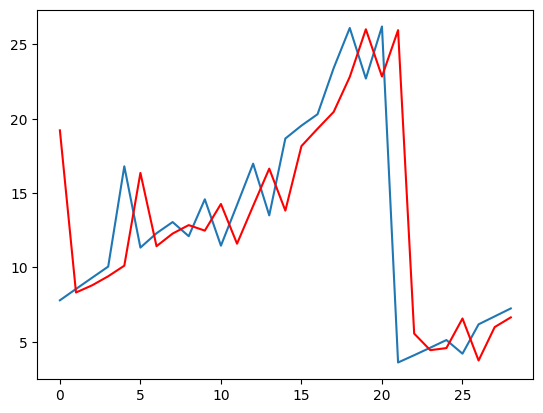

In [180]:
# arima model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

# Load the data
subsaharan_df = pd.read_csv('data/subsaharan-africa.csv')

subsaharan_df = subsaharan_df[(subsaharan_df['Year'] >= 2000) & (subsaharan_df['Year'] <= 2020)]

lowest_countries = ['Chad', 'Niger', 'Burkina Faso', 'Central African Republic', 'Congo', 'Burundi', 'Malawi', 'Sierra Leone', 'South Sudan']

subsaharan_df = subsaharan_df[subsaharan_df['Entity'].isin(lowest_countries)]

# Define the features and target variable

features = ['Access to clean fuels for cooking',
            'Renewable-electricity-generating-capacity-per-capita',
            'Electricity from fossil fuels (TWh)',
            'Electricity from nuclear (TWh)',
            'Electricity from renewables (TWh)',
            'Primary energy consumption per capita (kWh/person)',
            'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
            'gdp_growth',
            'gdp_per_capita'
]

target = 'Access to electricity (% of population)'
subsaharan_df = subsaharan_df[['Entity', 'Year', target] + features]

# Define the ARIMA model
def arima_model(train, test):
    history = [x for x in train]
    predictions = []
    
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        history.append(test[t])
    
    return predictions

# Split the data into train and test sets
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(subsaharan_df):
    train = subsaharan_df.iloc[train_index][target].values
    test = subsaharan_df.iloc[test_index][target].values
    predictions = arima_model(train, test)
    error = mean_squared_error(test, predictions)
    r2 = r2_score(test, predictions)
    print('Test MSE:', error)
    print('Test R2:', r2)


# Plot the predictions
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


C:\Users\Petter\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Petter\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Petter\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Petter\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Petter\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting par

Best Order: (1, 0, 0)
Best Error: 1.6271296654039933


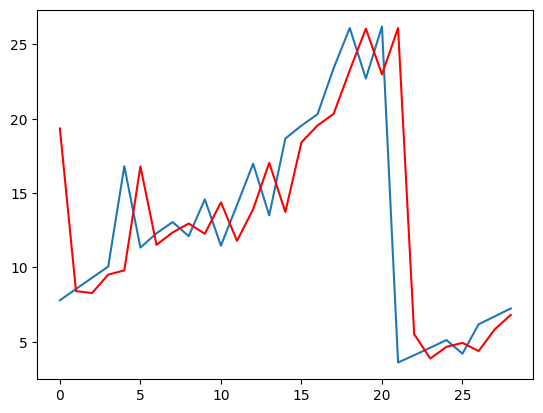

In [181]:
# gridsearch the arima model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from itertools import product

# Load the data
subsaharan_df = pd.read_csv('data/subsaharan-africa.csv')

subsaharan_df = subsaharan_df[(subsaharan_df['Year'] >= 2000) & (subsaharan_df['Year'] <= 2020)]

lowest_countries = ['Chad', 'Niger', 'Burkina Faso', 'Central African Republic', 'Congo', 'Burundi', 'Malawi', 'Sierra Leone', 'South Sudan']

subsaharan_df = subsaharan_df[subsaharan_df['Entity'].isin(lowest_countries)]

# Define the features and target variable

features = ['Access to clean fuels for cooking',
            'Renewable-electricity-generating-capacity-per-capita',
            'Electricity from fossil fuels (TWh)',
            'Electricity from nuclear (TWh)',
            'Electricity from renewables (TWh)',
            'Primary energy consumption per capita (kWh/person)',
            'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
            'gdp_growth',
            'gdp_per_capita'
]

target = 'Access to electricity (% of population)'

subsaharan_df = subsaharan_df[['Entity', 'Year', target] + features]

# Define the ARIMA model

def arima_model(train, test, order):
    history = [x for x in train]
    predictions = []
    
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        history.append(test[t])
    
    return predictions

# Split the data into train and test sets
tscv = TimeSeriesSplit(n_splits=5)

# Define the p, d, q values to search
p = range(0, 3)
d = range(0, 3)
q = range(0, 3)
orders = product(p, d, q)

best_order = None
best_error = float('inf')

for order in orders:
    for train_index, test_index in tscv.split(subsaharan_df):
        train = subsaharan_df.iloc[train_index][target].values
        test = subsaharan_df.iloc[test_index][target].values
        predictions = arima_model(train, test, order)
        error = mean_squared_error(test, predictions)
        if error < best_error:
            best_error = error
            best_order = order

print('Best Order:', best_order)
print('Best Error:', best_error)


# Plot the predictions
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [176]:
from pmdarima import auto_arima

def auto_arima_model(train, test):
    auto_model = auto_arima(train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    predictions = auto_model.predict(n_periods=len(test))
    return predictions

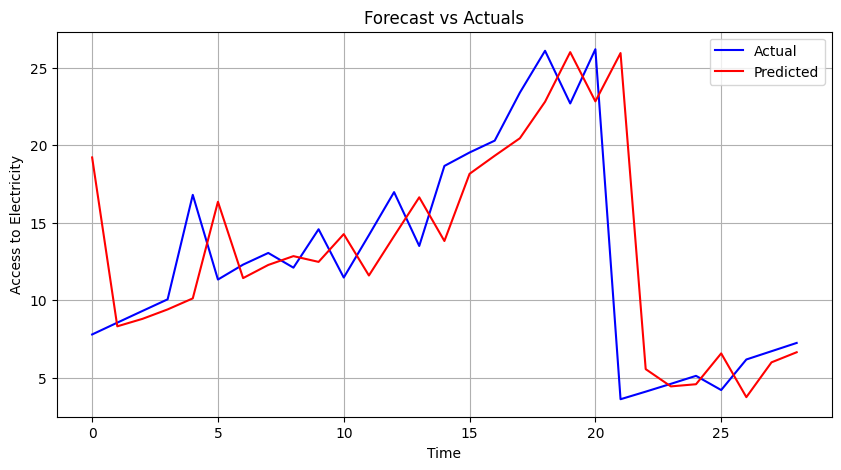

In [177]:
plt.figure(figsize=(10, 5))
plt.plot(test, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red')
plt.title('Forecast vs Actuals')
plt.xlabel('Time')
plt.ylabel('Access to Electricity')
plt.legend()
plt.grid(True)
plt.show()

Test MSE: 5.170408730650169
Test R2: 0.884992684761071


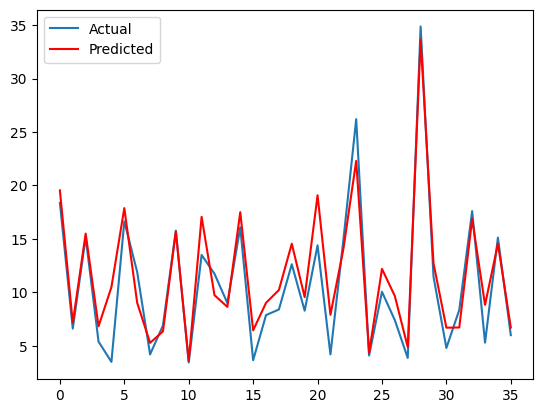

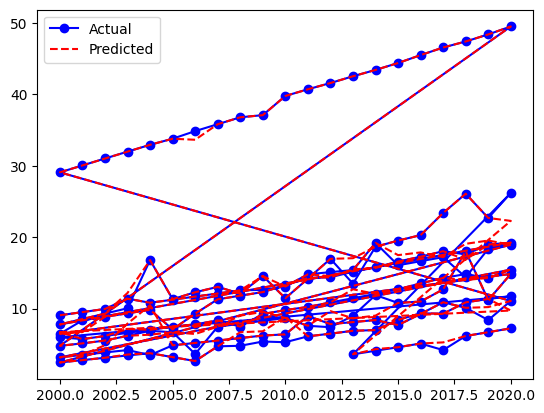

In [178]:
# XGBoost model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Load the data
subsaharan_df = pd.read_csv('data/subsaharan-africa.csv')

subsaharan_df = subsaharan_df[(subsaharan_df['Year'] >= 2000) & (subsaharan_df['Year'] <= 2020)]

lowest_countries = ['Chad', 'Niger', 'Burkina Faso', 'Central African Republic', 'Congo', 'Burundi', 'Malawi', 'Sierra Leone', 'South Sudan']

subsaharan_df = subsaharan_df[subsaharan_df['Entity'].isin(lowest_countries)]

# Define the features and target variable
features = ['Access to clean fuels for cooking',
            'Renewable-electricity-generating-capacity-per-capita',
            'Electricity from fossil fuels (TWh)',
            'Electricity from nuclear (TWh)',
            'Electricity from renewables (TWh)',
            'Primary energy consumption per capita (kWh/person)',
#            'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
            'gdp_growth',
            'gdp_per_capita'
]

target = 'Access to electricity (% of population)'
subsaharan_df = subsaharan_df[['Entity', 'Year', target] + features]

# Split the data into train and test sets
X = subsaharan_df[features]
y = subsaharan_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model
model = XGBRegressor()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
error = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Test MSE:', error)
print('Test R2:', r2)

# plot the predictions

plt.plot(y_test.values)
plt.plot(y_pred, color='red')
plt.legend(['Actual', 'Predicted'])
plt.show()

# plot the forecast on time series

plt.plot(subsaharan_df['Year'], subsaharan_df[target], 
         label='Actual', 
         color='blue',
         marker='o'
         )
plt.plot(subsaharan_df['Year'], model.predict(subsaharan_df[features]), 
         label='Predicted', 
         color='red', 
         linestyle='dashed'
         )

plt.legend()
plt.show()

# forecast up to 2030
# future_years = np.arange(2021, 2031).reshape(-1, 1)
# future_data = pd.DataFrame(future_years, columns=['Year'])

# for col in features:
#     future_data[col] = subsaharan_df[col].mean()

# plt.plot(subsaharan_df['Year'], subsaharan_df[target], label='Actual')
# plt.plot(future_years, model.predict(future_data), 
#          label='Predicted', 
#          color='red', 
#          linestyle='dashed'
#          )

# plt.legend()
# plt.show()

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Test MSE: 5.130979415542232
Test R2: 0.885869725611902


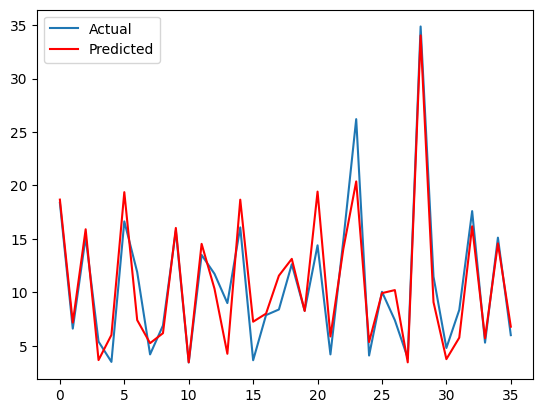

In [179]:
# could we gridsearch on the XGboost model to improve the model?

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Define the XGBoost model
model = XGBRegressor()

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

# Fit the model with the best parameters
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
error = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Test MSE:', error)
print('Test R2:', r2)

# plot the predictions

plt.plot(y_test.values)
plt.plot(y_pred, color='red')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [182]:
low_df = pd.read_csv('data/lowest_df_cleaned.csv')
low_df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),gdp_growth,gdp_per_capita
0,63,63,63,Burkina Faso,2000,9.075020,2.70,2.80,85.4100,0.22,0.0,0.10,31.250000,358.42392,1.888474,255.718687
1,64,64,64,Burkina Faso,2001,9.521352,2.90,2.72,83.6800,0.27,0.0,0.05,15.625000,386.41492,6.613406,267.097600
2,65,65,65,Burkina Faso,2002,9.960099,3.10,2.64,79.3400,0.30,0.0,0.06,16.666666,392.56390,4.352964,294.665389
3,66,66,66,Burkina Faso,2003,11.400000,3.40,2.58,79.0800,0.35,0.0,0.10,22.222223,421.10350,7.802494,374.627358
4,67,67,67,Burkina Faso,2004,10.824239,3.70,2.54,83.5300,0.37,0.0,0.10,21.276596,367.58755,4.478452,418.376660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,772,772,772,Sierra Leone,2016,20.300000,0.50,12.35,73.6000,0.06,0.0,0.16,72.727270,591.51733,6.055474,501.415166
143,773,773,773,Sierra Leone,2017,23.400000,0.60,13.16,74.6100,0.06,0.0,0.17,73.913040,573.70355,4.192610,496.682295
144,774,774,774,Sierra Leone,2018,26.100000,0.65,12.95,75.9500,0.06,0.0,0.20,76.923080,568.16583,3.464602,533.991533
145,775,775,775,Sierra Leone,2019,22.700000,0.70,12.68,75.4400,0.02,0.0,0.19,90.476200,513.00440,5.254241,521.754837


In [183]:
low_df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Entity', 'Year',
       'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)', 'gdp_growth',
       'gdp_per_capita'],
      dtype='object')

In [184]:
low_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.2', 'Unnamed: 0.1'], inplace=True)

In [185]:
low_df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)', 'gdp_growth',
       'gdp_per_capita'],
      dtype='object')

In [187]:
low_df.to_csv('data/lowest_df_cleaned.csv', index=False)

In [188]:
sub_df = pd.read_csv('data/subsaharan-africa.csv')
sub_df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Entity', 'Year',
       'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [189]:
sub_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.2', 'Unnamed: 0.1'], inplace=True)
sub_df.to_csv('data/subsaharan-africa.csv', index=False)